In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error

from keras.models import Sequential
from keras.layers import InputLayer, LSTM, Dense, Dropout, Conv1D, MaxPooling1D, BatchNormalization
from keras.optimizers import Adam
from keras.losses import MeanSquaredError
from keras.metrics import RootMeanSquaredError
from keras.constraints import MaxNorm
from keras.callbacks import ModelCheckpoint

import time

In [2]:
filepath = 'C:/Users/ss230/Documents/Study/NSIDC/Edited Data/S_Sea_Ice_Index_Regional_Monthly_Data_G02135_v3.0.xlsx'
Ross_Extent = pd.read_excel(filepath, sheet_name='Ross-Extent-km^2')

In [3]:
import sys
sys.path.append('C:/Users/ss230/Documents/Study/NSIDC/SH/Bi_LSTM_Extent/')
import Function as fp

In [4]:
fp.month_mapping(Ross_Extent)
fp.date_time(Ross_Extent)

,Extent,Date
0,1040455.516,1979-01-01
1,239334.118,1979-02-01
2,557365.154,1979-03-01
3,2054855.924,1979-04-01
4,2973925.625,1979-05-01
...,...,...
533,3137598.938,2023-06-01
534,3201783.453,2023-07-01
535,2973294.266,2023-08-01
536,3354839.711,2023-09-01


In [5]:
scaler = MinMaxScaler()
Ross_Extent['Extent'] = scaler.fit_transform(Ross_Extent['Extent'].values.reshape(-1, 1))

In [6]:
def df_to_X_y(df, window_size):
    df_as_np = df.to_numpy()
    X = []
    y = []
    lead_time = 8
    for i in range(len(df_as_np) - window_size - lead_time + 1):
        window_data = df_as_np[i:i+window_size]
        row = [[a] for a in window_data]
        X.append(row)
        label = df_as_np[i+window_size+lead_time-1]
        y.append(label)
    return np.array(X), np.array(y)

In [7]:
extent = Ross_Extent['Extent']
W_S=12
X,y = df_to_X_y(extent, W_S)
X.shape, y.shape

((519, 12, 1), (519,))

In [8]:
X_train, y_train = X[:420], y[:420]
X_val, y_val = X[420:472], y[420:472]
X_test, y_test = X[472:], y[472:]

In [9]:
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(W_S, 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(LSTM(32, kernel_constraint=MaxNorm(1.0), activation='relu'))
model.add(BatchNormalization())
model.add(Dense(1, activation='linear'))

In [10]:
cp = ModelCheckpoint('Ross_model_LT8/', save_best_only=True)
model.compile(loss=MeanSquaredError(), optimizer=Adam(0.0001), metrics=[RootMeanSquaredError()])

In [11]:
stime = time.time()
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=8, callbacks=[cp])
etime = time.time()

Epoch 1/50
53/53 [==============================] - ETA: 0s - loss: 0.3697 - root_mean_squared_error: 0.6080

INFO:tensorflow:Assets written to: Ross_model_LT8\assets


INFO:tensorflow:Assets written to: Ross_model_LT8\assets


53/53 [==============================] - 7s 85ms/step - loss: 0.3697 - root_mean_squared_error: 0.6080 - val_loss: 0.3059 - val_root_mean_squared_error: 0.5531
Epoch 2/50
49/53 [==========================>...] - ETA: 0s - loss: 0.3046 - root_mean_squared_error: 0.5519

INFO:tensorflow:Assets written to: Ross_model_LT8\assets


INFO:tensorflow:Assets written to: Ross_model_LT8\assets


53/53 [==============================] - 4s 77ms/step - loss: 0.2991 - root_mean_squared_error: 0.5469 - val_loss: 0.2792 - val_root_mean_squared_error: 0.5283
Epoch 3/50
52/53 [============================>.] - ETA: 0s - loss: 0.2520 - root_mean_squared_error: 0.5020

INFO:tensorflow:Assets written to: Ross_model_LT8\assets


INFO:tensorflow:Assets written to: Ross_model_LT8\assets


53/53 [==============================] - 3s 65ms/step - loss: 0.2519 - root_mean_squared_error: 0.5019 - val_loss: 0.2506 - val_root_mean_squared_error: 0.5006
Epoch 4/50
53/53 [==============================] - ETA: 0s - loss: 0.2059 - root_mean_squared_error: 0.4538

INFO:tensorflow:Assets written to: Ross_model_LT8\assets


INFO:tensorflow:Assets written to: Ross_model_LT8\assets


53/53 [==============================] - 4s 71ms/step - loss: 0.2059 - root_mean_squared_error: 0.4538 - val_loss: 0.2181 - val_root_mean_squared_error: 0.4670
Epoch 5/50
51/53 [===========================>..] - ETA: 0s - loss: 0.1707 - root_mean_squared_error: 0.4132

INFO:tensorflow:Assets written to: Ross_model_LT8\assets


INFO:tensorflow:Assets written to: Ross_model_LT8\assets


53/53 [==============================] - 3s 64ms/step - loss: 0.1717 - root_mean_squared_error: 0.4144 - val_loss: 0.1904 - val_root_mean_squared_error: 0.4364
Epoch 6/50
53/53 [==============================] - ETA: 0s - loss: 0.1370 - root_mean_squared_error: 0.3702

INFO:tensorflow:Assets written to: Ross_model_LT8\assets


INFO:tensorflow:Assets written to: Ross_model_LT8\assets


53/53 [==============================] - 3s 63ms/step - loss: 0.1370 - root_mean_squared_error: 0.3702 - val_loss: 0.1531 - val_root_mean_squared_error: 0.3912
Epoch 7/50
51/53 [===========================>..] - ETA: 0s - loss: 0.1083 - root_mean_squared_error: 0.3291

INFO:tensorflow:Assets written to: Ross_model_LT8\assets


INFO:tensorflow:Assets written to: Ross_model_LT8\assets


53/53 [==============================] - 4s 68ms/step - loss: 0.1064 - root_mean_squared_error: 0.3262 - val_loss: 0.1315 - val_root_mean_squared_error: 0.3627
Epoch 8/50
53/53 [==============================] - ETA: 0s - loss: 0.0844 - root_mean_squared_error: 0.2906

INFO:tensorflow:Assets written to: Ross_model_LT8\assets


INFO:tensorflow:Assets written to: Ross_model_LT8\assets


53/53 [==============================] - 3s 66ms/step - loss: 0.0844 - root_mean_squared_error: 0.2906 - val_loss: 0.0995 - val_root_mean_squared_error: 0.3155
Epoch 9/50
46/53 [=========================>....] - ETA: 0s - loss: 0.0671 - root_mean_squared_error: 0.2591

INFO:tensorflow:Assets written to: Ross_model_LT8\assets


INFO:tensorflow:Assets written to: Ross_model_LT8\assets


53/53 [==============================] - 4s 68ms/step - loss: 0.0641 - root_mean_squared_error: 0.2532 - val_loss: 0.0708 - val_root_mean_squared_error: 0.2662
Epoch 10/50
46/53 [=========================>....] - ETA: 0s - loss: 0.0522 - root_mean_squared_error: 0.2285

INFO:tensorflow:Assets written to: Ross_model_LT8\assets


INFO:tensorflow:Assets written to: Ross_model_LT8\assets


53/53 [==============================] - 4s 71ms/step - loss: 0.0513 - root_mean_squared_error: 0.2265 - val_loss: 0.0557 - val_root_mean_squared_error: 0.2361
Epoch 11/50
49/53 [==========================>...] - ETA: 0s - loss: 0.0374 - root_mean_squared_error: 0.1933

INFO:tensorflow:Assets written to: Ross_model_LT8\assets


INFO:tensorflow:Assets written to: Ross_model_LT8\assets


53/53 [==============================] - 3s 62ms/step - loss: 0.0359 - root_mean_squared_error: 0.1896 - val_loss: 0.0418 - val_root_mean_squared_error: 0.2045
Epoch 12/50
50/53 [===========================>..] - ETA: 0s - loss: 0.0309 - root_mean_squared_error: 0.1758

INFO:tensorflow:Assets written to: Ross_model_LT8\assets


INFO:tensorflow:Assets written to: Ross_model_LT8\assets


53/53 [==============================] - 4s 73ms/step - loss: 0.0297 - root_mean_squared_error: 0.1725 - val_loss: 0.0280 - val_root_mean_squared_error: 0.1672
Epoch 13/50
46/53 [=========================>....] - ETA: 0s - loss: 0.0239 - root_mean_squared_error: 0.1547

INFO:tensorflow:Assets written to: Ross_model_LT8\assets


INFO:tensorflow:Assets written to: Ross_model_LT8\assets


53/53 [==============================] - 4s 68ms/step - loss: 0.0234 - root_mean_squared_error: 0.1528 - val_loss: 0.0217 - val_root_mean_squared_error: 0.1474
Epoch 14/50
45/53 [========================>.....] - ETA: 0s - loss: 0.0204 - root_mean_squared_error: 0.1429

INFO:tensorflow:Assets written to: Ross_model_LT8\assets


INFO:tensorflow:Assets written to: Ross_model_LT8\assets


53/53 [==============================] - 3s 65ms/step - loss: 0.0206 - root_mean_squared_error: 0.1437 - val_loss: 0.0135 - val_root_mean_squared_error: 0.1162
Epoch 15/50
49/53 [==========================>...] - ETA: 0s - loss: 0.0146 - root_mean_squared_error: 0.1207

INFO:tensorflow:Assets written to: Ross_model_LT8\assets


INFO:tensorflow:Assets written to: Ross_model_LT8\assets


53/53 [==============================] - 4s 74ms/step - loss: 0.0141 - root_mean_squared_error: 0.1188 - val_loss: 0.0118 - val_root_mean_squared_error: 0.1086
Epoch 16/50
43/53 [=======================>......] - ETA: 0s - loss: 0.0134 - root_mean_squared_error: 0.1157

INFO:tensorflow:Assets written to: Ross_model_LT8\assets


INFO:tensorflow:Assets written to: Ross_model_LT8\assets


53/53 [==============================] - 3s 63ms/step - loss: 0.0143 - root_mean_squared_error: 0.1197 - val_loss: 0.0093 - val_root_mean_squared_error: 0.0966
Epoch 17/50
52/53 [============================>.] - ETA: 0s - loss: 0.0122 - root_mean_squared_error: 0.1104

INFO:tensorflow:Assets written to: Ross_model_LT8\assets


INFO:tensorflow:Assets written to: Ross_model_LT8\assets


53/53 [==============================] - 3s 66ms/step - loss: 0.0122 - root_mean_squared_error: 0.1107 - val_loss: 0.0079 - val_root_mean_squared_error: 0.0888
Epoch 18/50
45/53 [========================>.....] - ETA: 0s - loss: 0.0132 - root_mean_squared_error: 0.1151

INFO:tensorflow:Assets written to: Ross_model_LT8\assets


INFO:tensorflow:Assets written to: Ross_model_LT8\assets


53/53 [==============================] - 4s 70ms/step - loss: 0.0122 - root_mean_squared_error: 0.1106 - val_loss: 0.0064 - val_root_mean_squared_error: 0.0800
Epoch 19/50
43/53 [=======================>......] - ETA: 0s - loss: 0.0112 - root_mean_squared_error: 0.1060

INFO:tensorflow:Assets written to: Ross_model_LT8\assets


INFO:tensorflow:Assets written to: Ross_model_LT8\assets


53/53 [==============================] - 3s 64ms/step - loss: 0.0110 - root_mean_squared_error: 0.1047 - val_loss: 0.0063 - val_root_mean_squared_error: 0.0795
Epoch 20/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0108 - root_mean_squared_error: 0.1040 - val_loss: 0.0109 - val_root_mean_squared_error: 0.1045
Epoch 21/50
53/53 [==============================] - 0s 6ms/step - loss: 0.0117 - root_mean_squared_error: 0.1084 - val_loss: 0.0122 - val_root_mean_squared_error: 0.1104
Epoch 22/50
53/53 [==============================] - 0s 6ms/step - loss: 0.0118 - root_mean_squared_error: 0.1088 - val_loss: 0.0117 - val_root_mean_squared_error: 0.1082
Epoch 23/50
53/53 [==============================] - 0s 6ms/step - loss: 0.0112 - root_mean_squared_error: 0.1058 - val_loss: 0.0084 - val_root_mean_squared_error: 0.0917
Epoch 24/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0125 - root_mean_squared_error: 0.1120 - val_loss: 0.0104 - val_root_mean_squared

INFO:tensorflow:Assets written to: Ross_model_LT8\assets


INFO:tensorflow:Assets written to: Ross_model_LT8\assets


53/53 [==============================] - 3s 65ms/step - loss: 0.0120 - root_mean_squared_error: 0.1095 - val_loss: 0.0060 - val_root_mean_squared_error: 0.0776
Epoch 34/50
53/53 [==============================] - 0s 6ms/step - loss: 0.0141 - root_mean_squared_error: 0.1189 - val_loss: 0.0075 - val_root_mean_squared_error: 0.0865
Epoch 35/50
53/53 [==============================] - 0s 6ms/step - loss: 0.0119 - root_mean_squared_error: 0.1089 - val_loss: 0.0068 - val_root_mean_squared_error: 0.0824
Epoch 36/50
53/53 [==============================] - 0s 8ms/step - loss: 0.0108 - root_mean_squared_error: 0.1041 - val_loss: 0.0161 - val_root_mean_squared_error: 0.1268
Epoch 37/50
53/53 [==============================] - 1s 12ms/step - loss: 0.0101 - root_mean_squared_error: 0.1006 - val_loss: 0.0197 - val_root_mean_squared_error: 0.1402
Epoch 38/50
53/53 [==============================] - 0s 6ms/step - loss: 0.0116 - root_mean_squared_error: 0.1075 - val_loss: 0.0138 - val_root_mean_square

INFO:tensorflow:Assets written to: Ross_model_LT8\assets


INFO:tensorflow:Assets written to: Ross_model_LT8\assets


53/53 [==============================] - 4s 68ms/step - loss: 0.0130 - root_mean_squared_error: 0.1139 - val_loss: 0.0058 - val_root_mean_squared_error: 0.0761
Epoch 49/50
53/53 [==============================] - 0s 8ms/step - loss: 0.0127 - root_mean_squared_error: 0.1127 - val_loss: 0.0075 - val_root_mean_squared_error: 0.0867
Epoch 50/50
53/53 [==============================] - 0s 9ms/step - loss: 0.0123 - root_mean_squared_error: 0.1107 - val_loss: 0.0093 - val_root_mean_squared_error: 0.0964


In [12]:
time = (etime - stime)/60
print(f'{time} minutes')

1.4627757350603738 minutes


In [13]:
loss = history.history['loss']
epochs = list(range(1, len(loss) + 1))

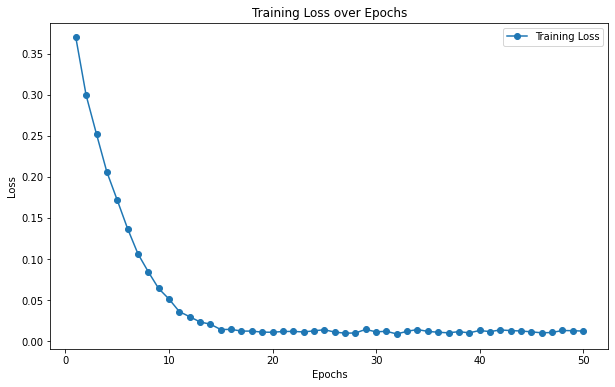

In [14]:
plt.figure(figsize=(10, 6))
plt.plot(epochs, loss, label='Training Loss', marker='o', linestyle='-')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs')
plt.legend()
plt.show()

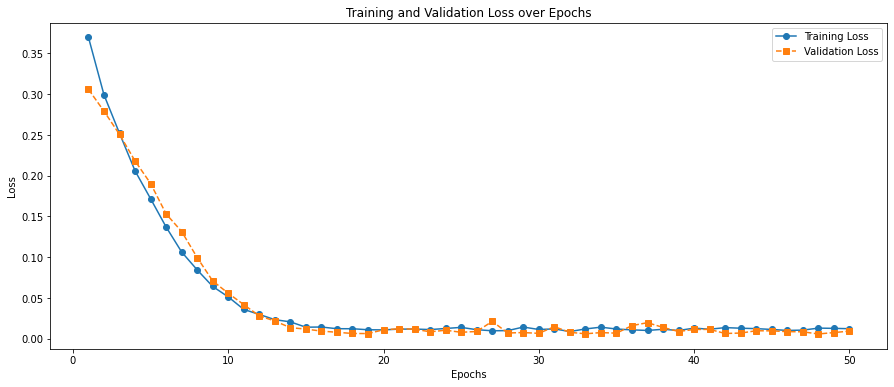

In [15]:
training_loss = history.history['loss']
validation_loss = history.history['val_loss']
epochs = range(1, len(training_loss) + 1)

plt.figure(figsize=(15,6))
plt.plot(epochs, training_loss, label='Training Loss', marker='o', linestyle='-')
plt.plot(epochs, validation_loss, label='Validation Loss', marker='s', linestyle='--')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss over Epochs')
plt.legend()
plt.show()

In [16]:
from tensorflow.keras.models import load_model
model1 = load_model('Ross_model_LT8/')

In [17]:
test_predictions = model1.predict(X_test)

2/2 [==============================] - 0s 4ms/step


In [18]:
mse = mean_squared_error(y_test, test_predictions)
print('RMSE :', np.sqrt(mse))

mae = mean_absolute_error(y_test, test_predictions)
print('MAE :', mae)

RMSE : 0.08021276313999214
MAE : 0.06028024686833071


In [19]:
test_predictions = scaler.inverse_transform(test_predictions)
test_original = scaler.inverse_transform(y_test.reshape(-1,1))

In [20]:
train_results = pd.DataFrame(data={'Train Predictions': test_predictions.flatten(), 'Actual Extent': test_original.flatten()})
train_results

,Train Predictions,Actual Extent
0,2.476164e+06,2715890.297
1,1.248379e+06,1053272.694
2,4.160084e+05,368862.123
3,1.126393e+06,979418.298
4,1.830836e+06,2086269.569
5,2.806009e+06,2852731.016
6,3.284317e+06,3452823.613
7,3.702947e+06,3846843.974
8,3.624352e+06,4005222.451
9,3.809166e+06,4129684.505


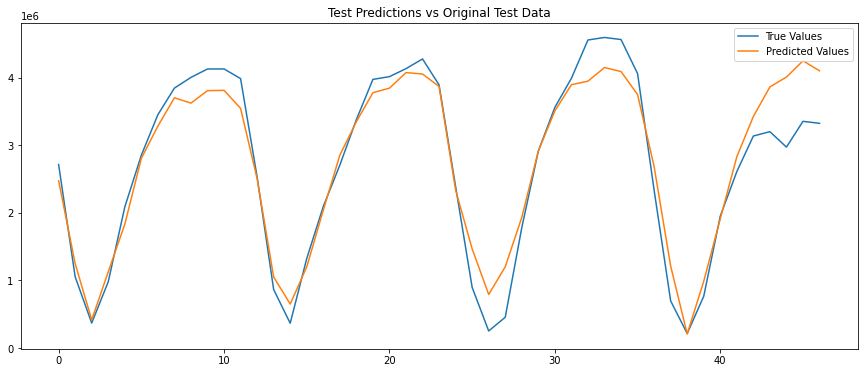

In [21]:
plt.figure(figsize=(15,6))
plt.plot(test_original, label='True Values')
plt.plot(test_predictions, label='Predicted Values')
plt.title('Test Predictions vs Original Test Data')
plt.legend()
plt.show()

In [22]:
predictions = model1.predict(X)

17/17 [==============================] - 0s 3ms/step


In [23]:
predictions = scaler.inverse_transform(predictions)
Original = scaler.inverse_transform(y.reshape(-1,1))

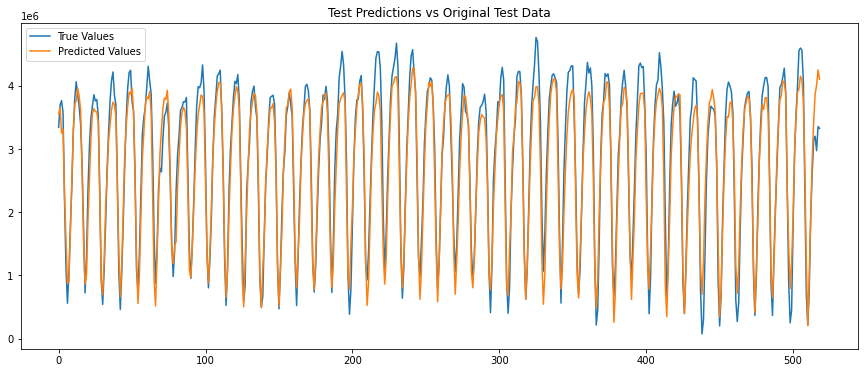

In [24]:
plt.figure(figsize=(15,6))
plt.plot(Original, label='True Values')
plt.plot(predictions, label='Predicted Values')
plt.title('Test Predictions vs Original Test Data')
plt.legend()
plt.show()